In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [6]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([3,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
#C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [7]:
SKL_div,JS_div

(array([[ 0.        ,  0.47705859,  0.59636629],
        [ 0.34160154,  0.        ,  0.3903125 ],
        [ 0.62161665,  0.29471877,  0.        ]]),
 array([[ 0.        ,  0.28333294,  0.46812247],
        [ 0.28333294,  0.        ,  0.22317728],
        [ 0.46812247,  0.22317728,  0.        ]]))

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = $\chi ^2 $

$s_2$ = Gaussiana

$s_3$ = Laplaciana

$s_4$ = Rayleigh

In [8]:
sources = np.loadtxt(source_path+'/'+'EighthSource100Stats.txt')
#matrix_A = np.loadtxt(source_path+'/'+'SixthMixMatrix.txt')

x = np.loadtxt(obs_path+'EighthMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [9]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.04983442,  0.16251627,  0.09892952,  0.09098937],
       [ 0.04983442,  1.        ,  0.1437822 ,  0.15670014,  0.19075184],
       [ 0.16251627,  0.1437822 ,  1.        ,  0.19426395,  0.167065  ],
       [ 0.09892952,  0.15670014,  0.19426395,  1.        ,  0.14796066],
       [ 0.09098937,  0.19075184,  0.167065  ,  0.14796066,  1.        ]])

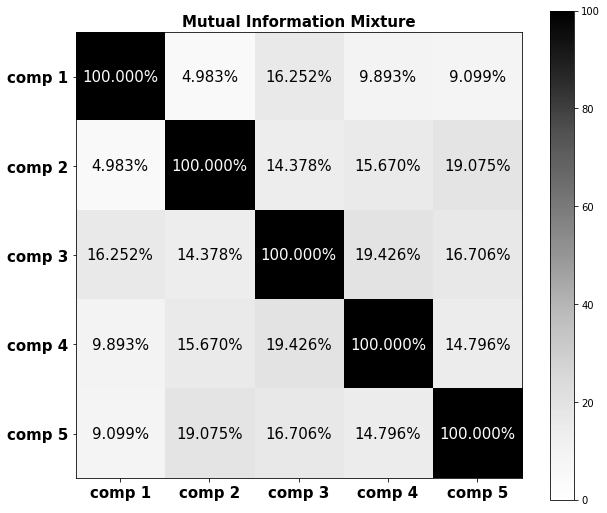

In [10]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run8_mix_MI_100',save=True)

In [11]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.06137297,  0.08538437,  0.03855615,  0.08991092],
       [ 0.06137297,  1.        ,  0.13827264,  0.13753076,  0.12346706],
       [ 0.08538437,  0.13827264,  1.        ,  0.13030203,  0.13520275],
       [ 0.03855615,  0.13753076,  0.13030203,  1.        ,  0.16416092],
       [ 0.08991092,  0.12346706,  0.13520275,  0.16416092,  1.        ]])

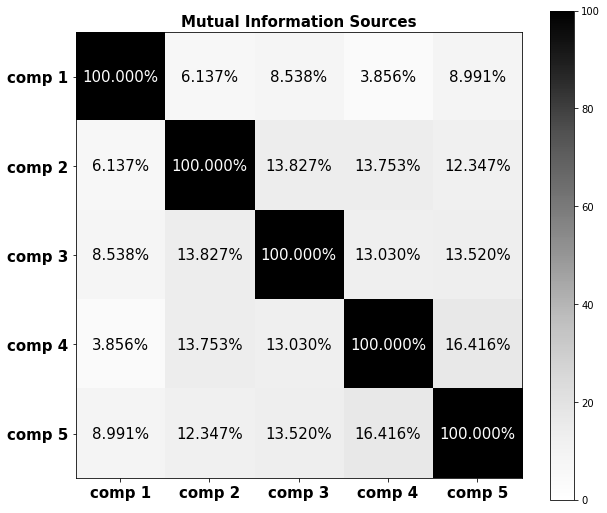

In [12]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run8_sources_MI_100',save=True)

In [13]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.428979  ,  0.30464186,  0.60809919,  0.5922991 ,  0.41071448],
         [ 1.05832533,  0.78036619,  1.3327202 ,  1.33557255,  1.0088677 ],
         [ 0.71530854,  0.4736486 ,  0.97849704,  0.93916097,  0.65855364],
         [ 0.8159855 ,  0.58179541,  1.08660118,  1.05456952,  0.74377495],
         [ 0.59003207,  0.36901073,  0.84297063,  0.80668214,  0.55575423]]),
  array([[ 0.3415981 ,  0.56690797,  0.50364297,  0.45497666,  0.42641323],
         [ 0.28063051,  0.85166645,  0.37237162,  0.39879469,  0.29015377],
         [ 0.39212556,  0.52488237,  0.54537275,  0.60180251,  0.52635105],
         [ 0.37655994,  0.50499602,  0.5304459 ,  0.58890095,  0.5385791 ],
         [ 0.31998441,  0.67347289,  0.5098601 ,  0.47413265,  0.42698136]])],
 array([[ 0.38528855,  0.43577492,  0.55587108,  0.52363788,  0.41856386],
        [ 0.66947792,  0.81601632,  0.85254591,  0.86718362,  0.64951074],
        [ 0.55371705,  0.49926549,  0.7619349 ,  0.77048174,  0.59245235],
        [ 

In [14]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 10
Time to converges the FastICA: 0.006 seconds


In [11]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 = 

NameError: name 'matrix_A' is not defined

In [15]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.15549249,  0.19172234,  0.26410022,  0.19042639],
       [ 0.15549249,  1.        ,  0.0952693 ,  0.10946754,  0.10337246],
       [ 0.19172234,  0.0952693 ,  1.        ,  0.1616292 ,  0.17013088],
       [ 0.26410022,  0.10946754,  0.1616292 ,  1.        ,  0.18310441],
       [ 0.19042639,  0.10337246,  0.17013088,  0.18310441,  1.        ]])

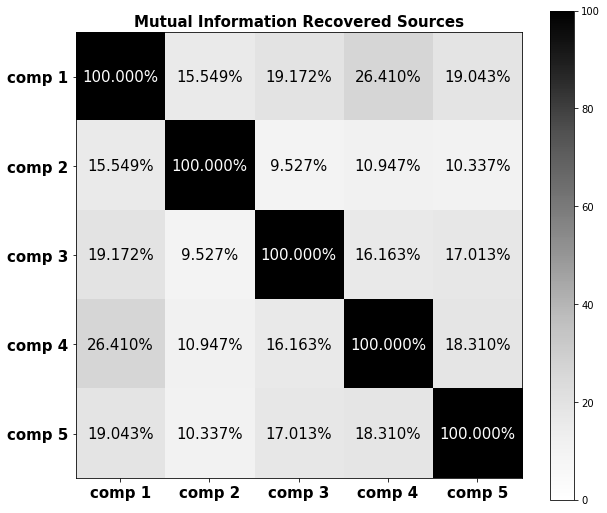

In [16]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run8_reco_MI_100',save=True)

In [17]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.09291885,  0.49598221,  0.05148238,  0.07410297,  0.11929685],
       [ 0.13903158,  0.07900094,  0.12701644,  0.10879605,  0.36255471],
       [ 0.38626628,  0.14647803,  0.14213277,  0.18135296,  0.12555734],
       [ 0.11072884,  0.08528234,  0.13014328,  0.57000428,  0.10655625],
       [ 0.11537897,  0.10165081,  0.58034666,  0.14275032,  0.13694213]])

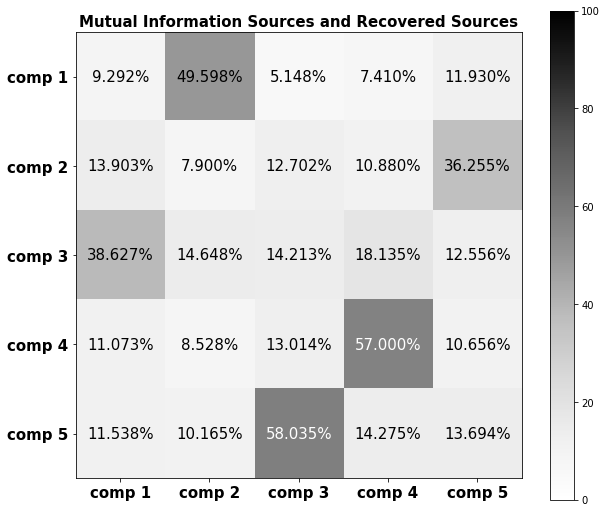

In [18]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run8_sourcesreco_MI_100',save=True)

In [19]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[1,:]
ordened_recovered_sources[1,:] = recovered_sources[4,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]
ordened_recovered_sources[3,:] = recovered_sources[3,:]
ordened_recovered_sources[4,:] = recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.49598221,  0.11929685,  0.09291885,  0.07410297,  0.05148238],
       [ 0.07900094,  0.36255471,  0.13903158,  0.10879605,  0.12701644],
       [ 0.14647803,  0.12555734,  0.38626628,  0.18135296,  0.14213277],
       [ 0.08528234,  0.10655625,  0.11072884,  0.57000428,  0.13014328],
       [ 0.10165081,  0.13694213,  0.11537897,  0.14275032,  0.58034666]])

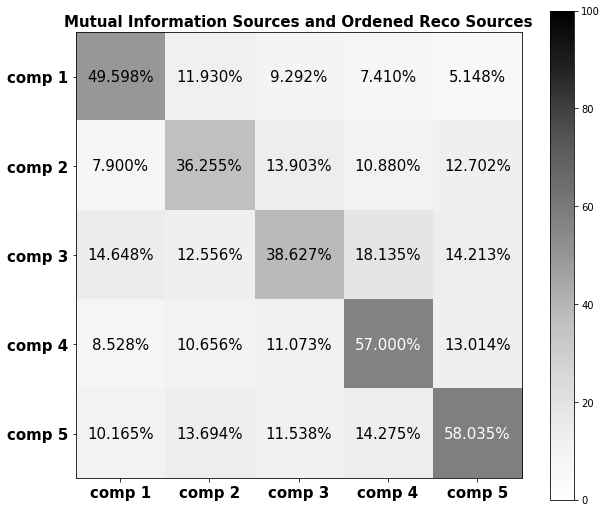

In [20]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run8_sourcesreco_ordened_MI_100',save=True)

In [21]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [22]:
SKL_div,JS_div

(array([[ 0.20528577,  0.59246292,  0.50425855,  0.46724725,  0.57651943],
        [ 0.86757569,  0.78565595,  0.8245286 ,  0.85764839,  0.62825744],
        [ 0.43334422,  0.37928415,  0.77543069,  0.68259623,  0.45582766],
        [ 0.51042468,  0.50540589,  0.88103388,  0.84567777,  0.57052714],
        [ 0.51067533,  0.49006124,  0.68252879,  0.68437835,  0.46903043]]),
 array([[ 0.14159583,  0.5335679 ,  0.29905064,  0.45428764,  0.32770285],
        [ 0.35646521,  0.39733726,  0.14199842,  0.25997097,  0.16876709],
        [ 0.281637  ,  0.66888075,  0.42716196,  0.55905362,  0.507515  ],
        [ 0.25398662,  0.62109262,  0.35150198,  0.53417158,  0.41030512],
        [ 0.30716517,  0.51000492,  0.27088052,  0.39778008,  0.26159873]]))

In [23]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.141596 &  0.533568 &  0.299051 &  0.454288 &  0.327703 \\
1 &  0.356465 &  0.397337 &  0.141998 &  0.259971 &  0.168767 \\
2 &  0.281637 &  0.668881 &  0.427162 &  0.559054 &  0.507515 \\
3 &  0.253987 &  0.621093 &  0.351502 &  0.534172 &  0.410305 \\
4 &  0.307165 &  0.510005 &  0.270881 &  0.397780 &  0.261599 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.205286 &  0.592463 &  0.504259 &  0.467247 &  0.576519 \\
1 &  0.867576 &  0.785656 &  0.824529 &  0.857648 &  0.628257 \\
2 &  0.433344 &  0.379284 &  0.775431 &  0.682596 &  0.455828 \\
3 &  0.510425 &  0.505406 &  0.881034 &  0.845678 &  0.570527 \\
4 &  0.510675 &  0.490061 &  0.682529 &  0.684378 &  0.469030 \\
\bottomrule
\end{tabular}



In [24]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = 0#amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = 0#amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[  1.00000000e+01,   0.00000000e+00,   0.00000000e+00],
       [  6.00000000e-03,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.80435219e+00,   0.00000000e+00,   0.00000000e+00]])

# Using 1000 stats

In [35]:
sources = np.loadtxt(source_path+'/'+'EighthSource1000Stats.txt')

x = np.loadtxt(obs_path+'EighthMixture1000Stats.txt')


In [30]:
x.shape

(5, 1000)

In [36]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

MemoryError: 

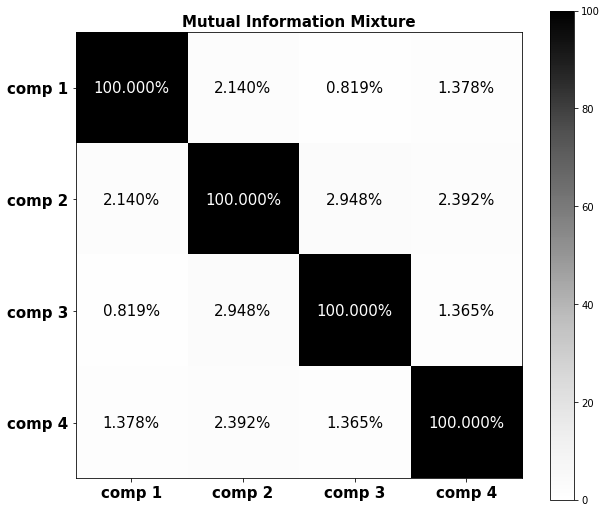

In [33]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run6_mix_MI_1k',save=True)

In [31]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.01698857,  0.02533445,  0.02850259,  0.02450301],
       [ 0.01698857,  1.        ,  0.05000478,  0.07390773,  0.05204335],
       [ 0.02533445,  0.05000478,  1.        ,  0.0617056 ,  0.06712023],
       [ 0.02850259,  0.07390773,  0.0617056 ,  1.        ,  0.05401223],
       [ 0.02450301,  0.05204335,  0.06712023,  0.05401223,  1.        ]])

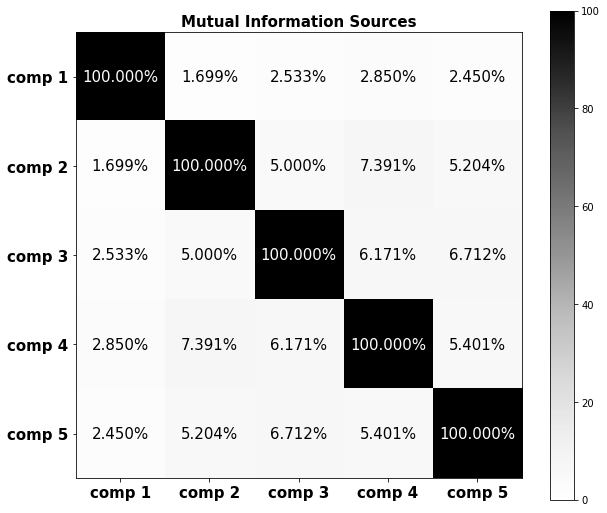

In [32]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run8_sources_MI_1k',save=True)

In [37]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 12
Time to converges the FastICA: 0.009 seconds


In [ ]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

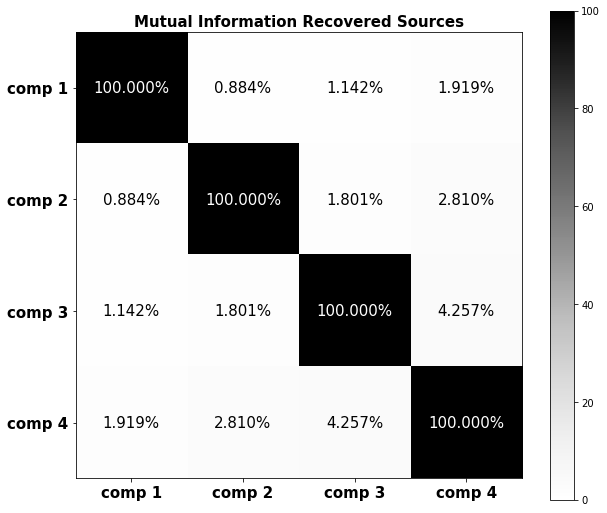

In [38]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run6_reco_MI_1k',save=True)

In [39]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.77053336,  0.0177083 ,  0.01634591,  0.03624363],
       [ 0.01229993,  0.01725159,  0.02216747,  0.44216786],
       [ 0.01178592,  0.67348666,  0.02142286,  0.09111663],
       [ 0.00972957,  0.02045191,  0.5804438 ,  0.1569102 ]])

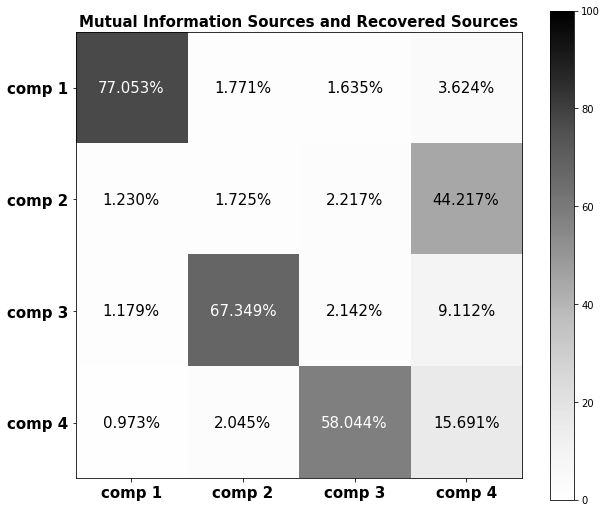

In [40]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run6_sourcesreco_MI_1k',save=True)

In [41]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.77053336,  0.03624363,  0.0177083 ,  0.01634591],
       [ 0.01229993,  0.44216786,  0.01725159,  0.02216747],
       [ 0.01178592,  0.09111663,  0.67348666,  0.02142286],
       [ 0.00972957,  0.1569102 ,  0.02045191,  0.5804438 ]])

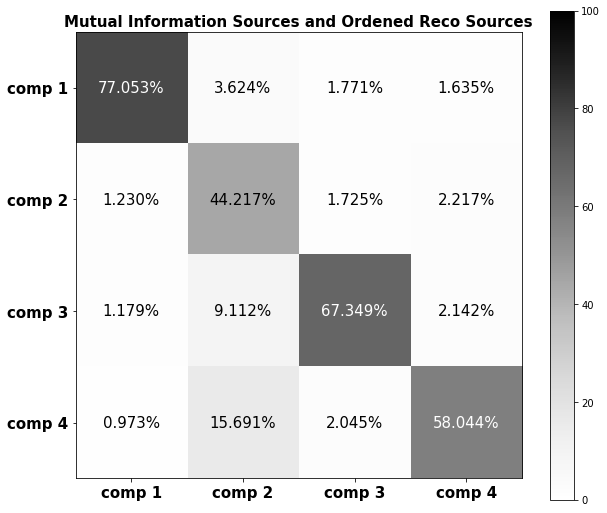

In [42]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run6_sourcesreco_ordened_MI_1k',save=True)

In [43]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [44]:
SKL_div,JS_div

(array([[ 0.27548236,  0.61867407,  0.55163414,  0.54163831],
        [ 0.70563689,  0.77375487,  1.32290072,  1.11809164],
        [ 0.35007155,  0.72677441,  0.53119873,  0.53305689],
        [ 0.45747902,  0.86526731,  0.58521799,  0.59901123]]),
 array([[ 0.14990261,  0.54324614,  0.07712794,  0.09598549],
        [ 0.24158162,  0.42729938,  0.20906921,  0.23402727],
        [ 0.59496818,  1.15829348,  0.33241841,  0.31760195],
        [ 0.48525959,  1.15724119,  0.37504831,  0.3616582 ]]))

In [45]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.149903 &  0.543246 &  0.077128 &  0.095985 \\
1 &  0.241582 &  0.427299 &  0.209069 &  0.234027 \\
2 &  0.594968 &  1.158293 &  0.332418 &  0.317602 \\
3 &  0.485260 &  1.157241 &  0.375048 &  0.361658 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.275482 &  0.618674 &  0.551634 &  0.541638 \\
1 &  0.705637 &  0.773755 &  1.322901 &  1.118092 \\
2 &  0.350072 &  0.726774 &  0.531199 &  0.533057 \\
3 &  0.457479 &  0.865267 &  0.585218 &  0.599011 \\
\bottomrule
\end{tabular}



In [46]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = 0#amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = 0#amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   3.00000000e+00,   0.00000000e+00],
       [  4.00000000e-03,   1.50000000e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.42403186e+00,   7.26214821e+00,   0.00000000e+00]])

# Using 100K stats

In [47]:
sources = np.loadtxt(source_path+'/'+'SixthSource100000Stats.txt')

x = np.loadtxt(obs_path+'SixthMixture100000Stats.txt')


In [48]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.00203207,  0.00131582,  0.00133255],
       [ 0.00203207,  1.        ,  0.00357653,  0.00334815],
       [ 0.00131582,  0.00357653,  1.        ,  0.00200578],
       [ 0.00133255,  0.00334815,  0.00200578,  1.        ]])

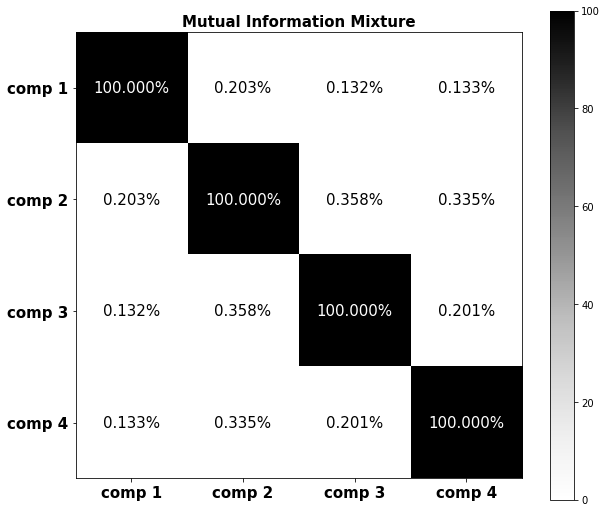

In [49]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run6_mix_MI_100k',save=True)

In [50]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.0025655 ,  0.0027471 ,  0.00268419],
       [ 0.0025655 ,  1.        ,  0.01261232,  0.01475425],
       [ 0.0027471 ,  0.01261232,  1.        ,  0.01169168],
       [ 0.00268419,  0.01475425,  0.01169168,  1.        ]])

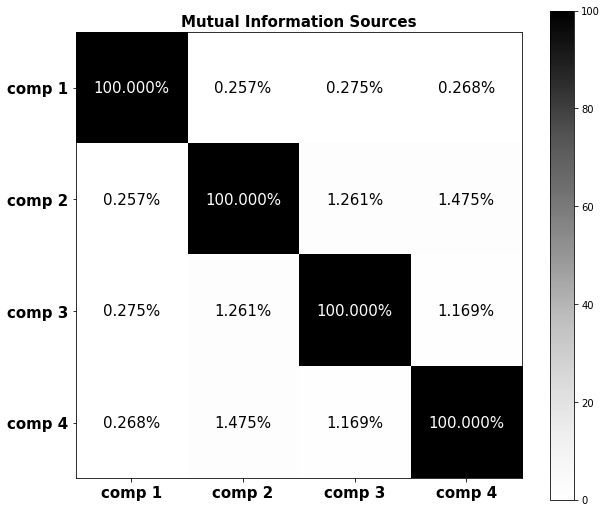

In [51]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run6_sources_MI_100k',save=True)

In [52]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 3
Time to converges the FastICA: 0.175 seconds


In [53]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.00132152,  0.00126319,  0.00221299],
       [ 0.00132152,  1.        ,  0.00211589,  0.00327847],
       [ 0.00126319,  0.00211589,  1.        ,  0.00360613],
       [ 0.00221299,  0.00327847,  0.00360613,  1.        ]])

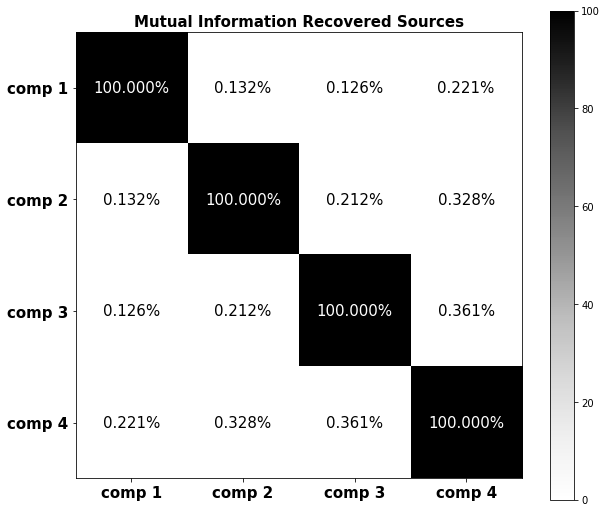

In [54]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run6_reco_MI_100k',save=True)

In [55]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.83050696,  0.00201936,  0.00208299,  0.00456229],
       [ 0.0015221 ,  0.00195809,  0.00198389,  0.57008521],
       [ 0.00149203,  0.0022132 ,  0.78791253,  0.02106958],
       [ 0.00124929,  0.66186858,  0.00219178,  0.0493367 ]])

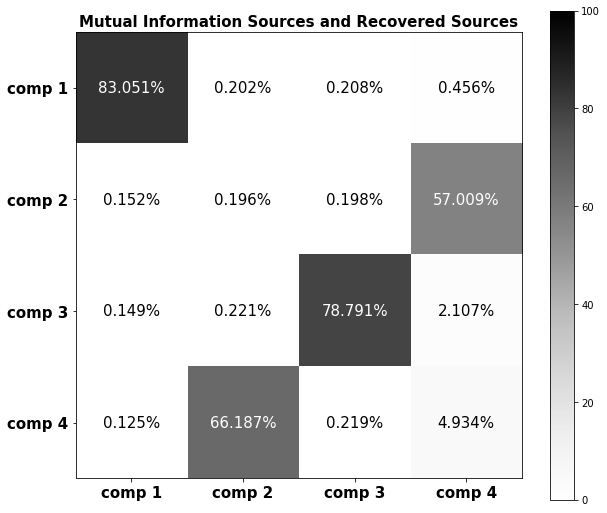

In [56]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run6_sourcesreco_MI_100k',save=True)

In [57]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[2,:]
ordened_recovered_sources[3,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.83050696,  0.00456229,  0.00208299,  0.00201936],
       [ 0.0015221 ,  0.57008521,  0.00198389,  0.00195809],
       [ 0.00149203,  0.02106958,  0.78791253,  0.0022132 ],
       [ 0.00124929,  0.0493367 ,  0.00219178,  0.66186858]])

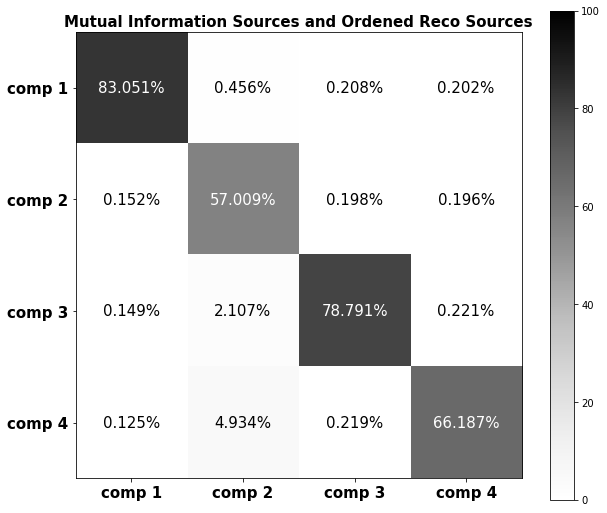

In [58]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run6_sourcesreco_ordened_MI_100k',save=True)

In [59]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [60]:
SKL_div,JS_div

(array([[ 0.27482481,  0.73124152,  0.51705997,  0.45331729],
        [ 0.92502566,  2.27351106,  1.46365638,  1.51284145],
        [ 0.37646271,  0.98576104,  0.68270841,  0.65499537],
        [ 0.56831525,  1.1821899 ,  0.82349445,  0.77495952]]),
 array([[ 0.15647656,  0.72193989,  0.05078948,  0.08316376],
        [ 0.2688481 ,  1.23955044,  0.35627813,  0.39649368],
        [ 0.48962657,  1.21959418,  0.44518188,  0.43906333],
        [ 0.40556556,  1.23329013,  0.43523358,  0.40574825]]))

In [61]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.156477 &  0.721940 &  0.050789 &  0.083164 \\
1 &  0.268848 &  1.239550 &  0.356278 &  0.396494 \\
2 &  0.489627 &  1.219594 &  0.445182 &  0.439063 \\
3 &  0.405566 &  1.233290 &  0.435234 &  0.405748 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.274825 &  0.731242 &  0.517060 &  0.453317 \\
1 &  0.925026 &  2.273511 &  1.463656 &  1.512841 \\
2 &  0.376463 &  0.985761 &  0.682708 &  0.654995 \\
3 &  0.568315 &  1.182190 &  0.823494 &  0.774960 \\
\bottomrule
\end{tabular}



In [62]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = 0#amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = 0#amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   3.00000000e+00,   3.00000000e+00],
       [  4.00000000e-03,   1.50000000e-02,   1.75000000e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.42403186e+00,   7.26214821e+00,   7.11133204e+00]])

In [63]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  6.000000 &  3.000000 &  3.000000 \\
1 &  0.004000 &  0.015000 &  0.175000 \\
2 &  0.000000 &  0.000000 &  0.000000 \\
3 &  0.000000 &  0.000000 &  0.000000 \\
4 &  6.424032 &  7.262148 &  7.111332 \\
\bottomrule
\end{tabular}

